<a href="https://colab.research.google.com/github/Cal-Poly-Data-301/lab-1-phase-2-swissflyer/blob/main/Copy_of_DATA_301_Lab_1A_Collin_Streun.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Distribution of First Digits

In this lab, you will explore the distribution of first digits in real data. For example, the first digits of the numbers 52, 30.8, and 0.07 are 5, 3, and 7 respectively. In this lab, you will investigate the question: how frequently does each digit 1-9 appear as the first digit of the number?

## Question 0

Make a prediction. 

1. Approximately what percentage of the values do you think will have a _first_ digit of 1? What percentage of the values do you think will have a first digit of 9?
2. Approximately what percentage of the values do you think will have a _last_ digit of 1? What percentage of the values do you think will have a last digit of 9?

(Don't worry about being wrong. You will earn full credit for any justified answer.)

1) I think that 11% of the digits will start with a 1 and 11% will start with a 9 becuase 1/9 is 11%.

2) I am using the same logic for this question as the first one. I think that 11% of the digits will end with a 1 and 11% will end with a 9 becuase 1/9 is 11%.

## Question 1

The [S&P 500](https://en.wikipedia.org/wiki/S%26P_500_Index) is a stock index based on the market capitalizations of large companies that are publicly traded on the NYSE or NASDAQ. The CSV file (https://dlsun.github.io/pods/data/sp500.csv) contains data from February 1, 2018 about the stocks that comprise the S&P 500. We will investigate the first digit distributions of the variables in this data set.

Read in the S&P 500 data. What is the unit of observation in this data set? Is there a variable that is natural to use as the index? If so, set that variable to be the index. Once you are done, display the `DataFrame`.

In [2]:
import pandas as pd
data_dir = "http://dlsun.github.io/pods/data/"
df_sp500 = pd.read_csv(data_dir + "sp500.csv")
df_sp500.set_index(["Name"], inplace=True)
df_sp500

,date,open,close,volume
Name,,,,
AAL,2018-02-01,$54.00,$53.88,3623078
AAPL,2018-02-01,$167.16,$167.78,47230787
AAP,2018-02-01,$116.24,$117.29,760629
ABBV,2018-02-01,$112.24,$116.34,9943452
ABC,2018-02-01,$97.74,$99.29,2786798
...,...,...,...,...
XYL,2018-02-01,$72.50,$74.84,1817612
YUM,2018-02-01,$84.24,$83.98,1685275
ZBH,2018-02-01,$126.35,$128.19,1756300


I chose to set the index to name as the sp500 is a stock based index and so it makes sense to use the name as the index

## Question 2

We will start by looking at the `volume` column. This variable tells us how many shares were traded on that date.

Extract the first digit of every value in this column. (_Hint:_ First, turn the numbers into strings. Then, use the [text processing functionalities](https://pandas.pydata.org/pandas-docs/stable/text.html) of `pandas` to extract the first character of each string.) Make an appropriate visualization to display the distribution of the first digits. (_Hint:_ Think carefully about whether the variable you are plotting is quantitative or categorical.)

How does this compare with what you predicted in Question 0?

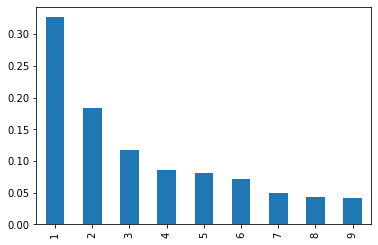

In [22]:
df_sp500["firstChar"] = df_sp500.volume.astype(str).str.replace("0", "").str.replace(".", "").str[0].astype(int)

df_volume = df_sp500["firstChar"].value_counts(normalize = True)
df_volume.plot.bar()


I was very wrong, it appears that the number 1 is appears greatly more often than the rest of the numbers

## Question 3

Now, repeat Question 2, but for the distribution of _last_ digits. Again, make an appropriate visualization and compare with your prediction in Question 0.

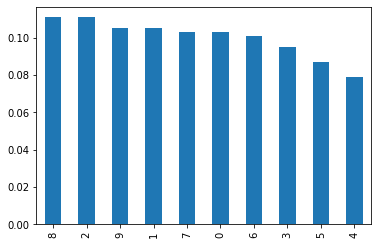

In [18]:
df_sp500["lastChar"] = df_sp500.volume.astype(str).str[-1].astype(int)
df_volume = df_sp500["lastChar"].value_counts(normalize = True)
df_volume.plot.bar()

This one was a lot closer to my prediction. Maybe 1 appears more often as a first digit as a lot of numbers are either in the 10's or 100's

## Question 4

Maybe the `volume` column was just a fluke. Let's see if the first digit distribution holds up when we look at a very different variable: the closing price of the stock. Make a visualization of the first digit distribution of the closing price (the `close` column of the `DataFrame`). Comment on what you see.

(_Hint:_ What type did `pandas` infer this variable as and why? You will have to first clean the values using the [text processing functionalities](https://pandas.pydata.org/pandas-docs/stable/text.html) of `pandas` and then convert this variable to a quantitative variable.)

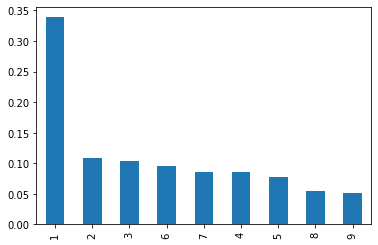

In [15]:

df_sp500["close_first_char"] = df_sp500.close.astype("string").str.replace("0", "").str.replace(".", "").str[1].astype(int)
df_close = df_sp500["close_first_char"].value_counts(normalize = True)
df_close.plot.bar()

Pandas assumed it was an object as it was probably confused as there was a dollar sign in it. The number 1 occurs most frequently. This leads me to believe that most prices are either in the 10's, 100's, or 1000's